# Modelo de classificação - Fake news nóticias real fake
- Modelo machine learning

In [4]:
!pip install watermark
!pip install wordcloud

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.8.2
    Uninstalling importlib-metadata-4.8.2:
      Successfully uninstalled importlib-metadata-4.8.2


In [5]:
# Versão do python 
from platform import python_version

print("Versão python neste notebook:", python_version())

Versão python neste notebook: 3.7.12


In [6]:
# Bibliotecas do python

import pandas as pd # Biblioteca para carregar dataset
import numpy as np # Manipulação de alegbra linear

# Bibliotecas para visualização de dados
import seaborn 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as m
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

import warnings 
warnings.filterwarnings("ignore")

In [7]:
# Carregamento e visualização das bibliotecas e versões 

%reload_ext watermark
%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

seaborn   : 0.11.2
numpy     : 1.19.5
matplotlib: 3.2.2
IPython   : 5.5.0
pandas    : 1.1.5



In [8]:
# configuração dos gráficos e cores, fontes pelo seaborn

plt.style.use('fivethirtyeight')
sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)

color = sns.color_palette()

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Carregando base de dados
# Base de dados - 1

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Artigo Fake News/Base/fake_or_real_news.csv")
data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [11]:
# Exibindo os 5 primeiras linhas com o comando head()
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [12]:
# Exibindo os 5 últimos linhas com o comando tail()
data.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [13]:
# Exibindo quantidades de linhas e colunas 
data.shape

(6335, 4)

In [14]:
# Exibindo os tipos de dados
data.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [15]:
# Exibindo a info dos dados verificar os tipos de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [16]:
# Verificando dados duplicados
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6330    False
6331    False
6332    False
6333    False
6334    False
Length: 6335, dtype: bool

In [17]:
# Quantidade de fake e real

total = data.label
print(total.head())

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object


In [18]:
# Verificando na coluna target total de fake, real 
# Dados de nóticias fake e real

noticias = data.label.value_counts
print("Total de nóticias verdadeiros e falso", noticias)

Total de nóticias verdadeiros e falso <bound method IndexOpsMixin.value_counts of 0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object>


In [19]:
# Renomerando as colunas

data.columns = ["ID", "Texto", "Data", "Previsão"]
data.head()

,ID,Texto,Data,Previsão
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# Análise de dados

Text(0, 0.5, 'Total')

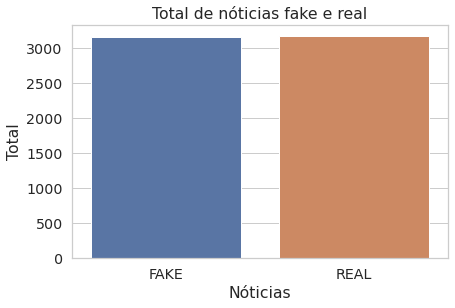

In [20]:
plt.title("Total de nóticias fake e real")
ax = sns.countplot(data["Previsão"])
plt.xlabel("Nóticias")
plt.ylabel("Total")

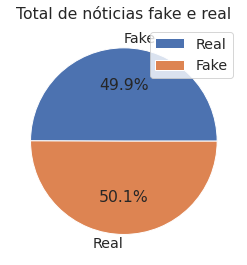

In [21]:
plt.pie(data.groupby("Previsão")['Previsão'].count(), labels=["Fake", "Real"], autopct = "%1.1f%%");
plt.title("Total de nóticias fake e real")
plt.legend(["Real", "Fake"])

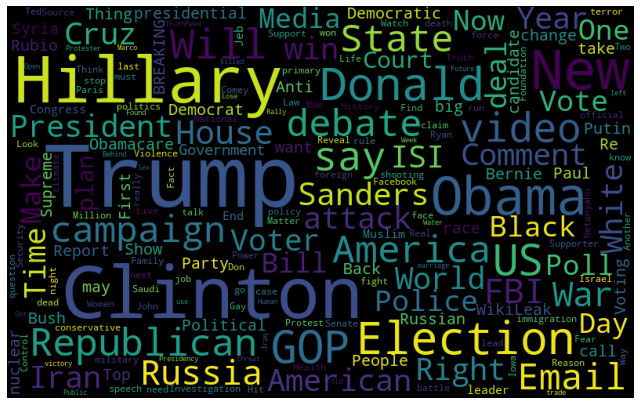

In [22]:
# Gráfico de nuvem com word cloud
from wordcloud import WordCloud

nuvem_palavras_df = ' '.join([texto for texto in data["Texto"]])
nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(nuvem_palavras_df)

plt.figure(figsize= (10, 7))
plt.imshow(nuvem_palavras)
plt.axis('off')
plt.show()

# Pré - processamento dos dados

In [23]:
import re
import nltk

nltk.download('punkt')
nltk.download("stopwords")
nltk.download('wordnet')

from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [24]:
# Exebindo os 5 primeiros antes da normalização dos dados
data.head()

,ID,Texto,Data,Previsão
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [25]:
# Utilizando One hot encoder

from sklearn.preprocessing import OneHotEncoder

HTE = ["Previsão"]

for x in HTE:
  hot = OneHotEncoder()
  data[x] = hot.fit_transform(data[x].values.reshape(-1,1)).toarray()

data.head()

,ID,Texto,Data,Previsão
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1.0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1.0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0.0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1.0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0.0


In [27]:
# Stopwords dos textos

#texto = data["Texto"][1]
#fd_1 = []
#fd_1 = re.sub("[^a-zA-Z0-9]+", " " , texto)
#fd_1 = fd_1.lower()
#fd_1 = nltk.word_tokenize(fd_1)

#for x in fd_1: 
#if x not in stopwords.words("english"):
#dx = nltk.WordNetLemmatizer()
#x = dx.lemmatize(x)
#fd_1.append(x)
#d  = " ".join(fd_1)

#for y in texto: 
#if y not in set(stopwords.words('english')):
#dx = nltk.WordNetLemmatizer()
#y = dx.lemmatize(word) 
#final_y.append(y)
#return " ".join(final_y)

# Removendo as pontuações
#def remove_pontuacao(texto):
#return re.sub('\[[^]]*\]', '', texto)

# lemmatization stopwords
#def stopwords_lemmatization(texto):
#final_text = []
#text = text.lower()
#text = nltk.word_tokenize(text)

# Characteres
#def characters_removidos(texto):
#return re.sub("[^a-zA-Z]"," ",texto)

# Limpeza dos base de texto
#def limpe(texto):
#texto = remove_pontuacao(texto)
#texto = characters_removidos(texto)
#texto = remove_stopwords_and_lemmatization(texto)
#return texto

# Limpeza base toda
#def limpeza(texto):
#txt_1 = []
#texto = re.sub('[^A-Za-z0-9]+', ' ', text)
#texto = texto.lower()
#texto = nltk.word_tokenize(texto)
#dx = nltk.WordNetLemmatizer()
#for s in texto:
#if s not in stopwords.words("english"):
#s = dx.lemmatize(s)
#str_x.append(s)
#return " ".join(str_x)

# Limpeza da base de dados
#data['Texto'] = data['Texto'].apply(limpeza)
#data_base = data['Texto'].apply(lambda x : len(x.split(" "))).sum()

In [28]:
txt = data['Texto'][1]

ft_1 = []
t1 = re.sub('[^a-zA-Z0-9]+', ' ', txt)
t1 = t1.lower()
t1 = nltk.word_tokenize(t1)

for word_a in t1:
    if word_a not in stopwords.words("english"):
        lemma = nltk.WordNetLemmatizer()
        word_a = lemma.lemmatize(word_a)
        ft_1.append(word_a)
        x = " ".join(ft_1)


def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)
 
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word) 
            final_text.append(word)
    return " ".join(final_text)

def cleaning(text):
    #text = remove_html(text)
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

def get_clean_data(text):
    last_text = []
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    text = text.lower()
    text = nltk.word_tokenize(text)
    lemma = nltk.WordNetLemmatizer()
    for word in text:
        if word not in stopwords.words("english"):
            word = lemma.lemmatize(word)
            last_text.append(word)
            
    return " ".join(last_text)

data['Texto'] = data['Texto'].apply(cleaning)
no_of_words = data['Texto'].apply(lambda x : len(x.split(" "))).sum()







In [23]:
# Defenindo base de treino e teste x e y

x = data["Texto"]
y = data["Previsão"]

In [24]:
# Visualizando linha e coluna da váriavel x

x.shape

(6335,)

In [25]:
# Visualizando linha e coluna da váriavel y

y.shape

(6335,)

In [40]:
# Treino e teste do modelo machine learning
# 20 para dados de treino
# 80 para dados de teste
# 20 para os dados de treino e 80 para teste e random state igual a zero

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [41]:
# Total de linhas e colunas e linhas dos dados de treino x
x_train.shape

(5068,)

In [42]:
# Total de linhas dos dados de treino y
y_train.shape

(5068,)

In [43]:
# Total de linhas e colunas dos dados de treino x teste 
x_test.shape

(1267,)

In [44]:
# Total de linhas e colunas dos dados de treino y teste 
y_test.shape

(1267,)

In [45]:
# Feature extraction text - TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vecto = TfidfVectorizer(stop_words = "english", max_df = 0.7)
tfidf_vecto_train = tfidf_vecto.fit_transform(x_train)
tfidf_vecto_test = tfidf_vecto.fit_transform(x_test)

In [46]:
tfidf_vecto_train.shape

(5068, 7528)

In [47]:
tfidf_vecto_test.shape

(1267, 3456)

**Modelo machine learning**
- Modelo 01 - Passive Aggressive Classifier

In [48]:
from sklearn.linear_model import PassiveAggressiveClassifier

model_passive_aggressive = PassiveAggressiveClassifier(max_iter=50)
model_passive_aggressive_fit = model_passive_aggressive.fit(tfidf_vecto_train, y_train)
model_passive_aggressive_score = model_passive_aggressive.score(tfidf_vecto_train, y_train)

print("modelo passive aggressive: %.2f" % (model_passive_aggressive_score * 100))

modelo passive aggressive: 99.92


In [52]:
model_passive_aggressive_predict = model_passive_aggressive.predict(x_test)
model_passive_aggressive_predict

ValueError: ignored

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import PassiveAggressiveClassifier

PAC_Model = Pipeline([('vect', CountVectorizer()),
                    ('trans', TfidfTransformer()),
                    ('pac', PassiveAggressiveClassifier())])

PAC_Model.fit(x_train, y_train)
PAC_Model_predict = PAC_Model.predict(x_test)
PAC_Model_predict

array([0., 0., 1., ..., 1., 0., 1.])

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_passive_aggressive = accuracy_score(y_test, PAC_Model_predict)
confusion_matrix = confusion_matrix(y_test, PAC_Model_predict)

print("Accuracy - Passive Aggressive Classifier: %.2f" % (accuracy_passive_aggressive * 100))

Accuracy - Passive Aggressive Classifier: 78.77


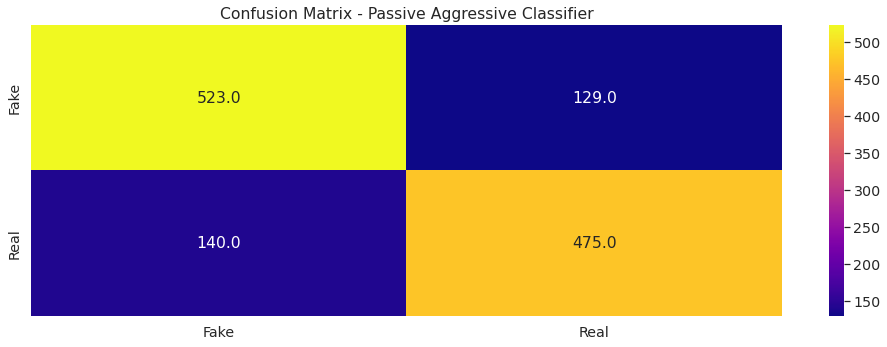

In [61]:
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, ax = ax, fmt = ".1f", cmap="plasma"); 

ax.set_title('Confusion Matrix - Passive Aggressive Classifier'); 
ax.xaxis.set_ticklabels(["Fake", "Real"]); ax.yaxis.set_ticklabels(["Fake", 'Real']);

In [56]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, PAC_Model_predict)
print("Modelo - Passive aggressive")
print("\n")
print(class_report)

Modelo - Passive aggressive


              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80       652
         1.0       0.79      0.77      0.78       615

    accuracy                           0.79      1267
   macro avg       0.79      0.79      0.79      1267
weighted avg       0.79      0.79      0.79      1267

